In [1]:
import findspark
findspark.init('/opt/spark')

In [2]:
import pyspark
from pyspark import SparkContext

In [3]:
sc = SparkContext()

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("My App").config("spark.some.config.option", "some-value").getOrCreate()

In [5]:
df = spark.read.csv("Salaries.csv", header=True, inferSchema=True)
# df_json = spark.read.json("people.csv", header=True, inferSchema=True)
# df_txt = spark.read.txt("people.csv", header=True, inferSchema=True)

In [6]:
df.show(3)

+---+--------------+--------------------+---------+-----------+---------+--------+---------+----------------+----+-----+-------------+------+
| Id|  EmployeeName|            JobTitle|  BasePay|OvertimePay| OtherPay|Benefits| TotalPay|TotalPayBenefits|Year|Notes|       Agency|Status|
+---+--------------+--------------------+---------+-----------+---------+--------+---------+----------------+----+-----+-------------+------+
|  1|NATHANIEL FORD|GENERAL MANAGER-M...|167411.18|        0.0|400184.25|    null|567595.43|       567595.43|2011| null|San Francisco|  null|
|  2|  GARY JIMENEZ|CAPTAIN III (POLI...|155966.02|  245131.88|137811.38|    null|538909.28|       538909.28|2011| null|San Francisco|  null|
|  3|ALBERT PARDINI|CAPTAIN III (POLI...|212739.13|  106088.18|  16452.6|    null|335279.91|       335279.91|2011| null|San Francisco|  null|
+---+--------------+--------------------+---------+-----------+---------+--------+---------+----------------+----+-----+-------------+------+
only s

In [7]:
# creating a table
df.createOrReplaceTempView("table1")

In [8]:
# sql() method executes  sql queries
# unlikely it cannot directly do that so in the previous step we crated a table and now sql() method can be used
# sql() maethod takes SQL sattements as argument and returns the result as DataFrame
df2 = spark.sql("Select EmployeeName from table1")
df.collect()

[Row(Id=1, EmployeeName='NATHANIEL FORD', JobTitle='GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY', BasePay='167411.18', OvertimePay='0.0', OtherPay='400184.25', Benefits=None, TotalPay=567595.43, TotalPayBenefits=567595.43, Year=2011, Notes=None, Agency='San Francisco', Status=None),
 Row(Id=2, EmployeeName='GARY JIMENEZ', JobTitle='CAPTAIN III (POLICE DEPARTMENT)', BasePay='155966.02', OvertimePay='245131.88', OtherPay='137811.38', Benefits=None, TotalPay=538909.28, TotalPayBenefits=538909.28, Year=2011, Notes=None, Agency='San Francisco', Status=None),
 Row(Id=3, EmployeeName='ALBERT PARDINI', JobTitle='CAPTAIN III (POLICE DEPARTMENT)', BasePay='212739.13', OvertimePay='106088.18', OtherPay='16452.6', Benefits=None, TotalPay=335279.91, TotalPayBenefits=335279.91, Year=2011, Notes=None, Agency='San Francisco', Status=None),
 Row(Id=4, EmployeeName='CHRISTOPHER CHONG', JobTitle='WIRE ROPE CABLE MAINTENANCE MECHANIC', BasePay='77916.0', OvertimePay='56120.71', OtherPay='198306.9', Ben

In [9]:
#  sql query to extract data
df.createOrReplaceTempView("table3")
query = '''Select EmployeeName from table3'''
test_df = spark.sql(query)
test_df.show(5) # printing the top 5 rows only

+-----------------+
|     EmployeeName|
+-----------------+
|   NATHANIEL FORD|
|     GARY JIMENEZ|
|   ALBERT PARDINI|
|CHRISTOPHER CHONG|
|  PATRICK GARDNER|
+-----------------+
only showing top 5 rows



In [10]:
df.createOrReplaceTempView("table3")
query = '''Select EmployeeName, max(TotalPay) from table3 GROUP BY EmployeeName'''
test_df = spark.sql(query)
test_df.show(5)

+----------------+-------------+
|    EmployeeName|max(TotalPay)|
+----------------+-------------+
|    NELSON ACETO|    199628.97|
|JENNIFER MATHEWS|    161692.35|
|    HSINMEI CHEN|    161209.16|
|    JOHN PAI JR.|    159338.89|
|     LUKE MARTIN|    158280.53|
+----------------+-------------+
only showing top 5 rows



In [11]:
df.createOrReplaceTempView("table3")
query = '''Select Year, BasePay, TotalPay from table3 where BasePay > 10000 AND Year = 2011  '''
test_df = spark.sql(query)
test_df.show(5)

+----+---------+---------+
|Year|  BasePay| TotalPay|
+----+---------+---------+
|2011|167411.18|567595.43|
|2011|155966.02|538909.28|
|2011|212739.13|335279.91|
|2011|  77916.0|332343.61|
|2011| 134401.6|326373.19|
+----+---------+---------+
only showing top 5 rows



In [20]:
plot_csv = spark.read.csv("Salaries.csv",header=True, inferSchema=True)

In [13]:
plot_csv_pandas = plot_csv.toPandas()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6a1fc35c0>]],
      dtype=object)

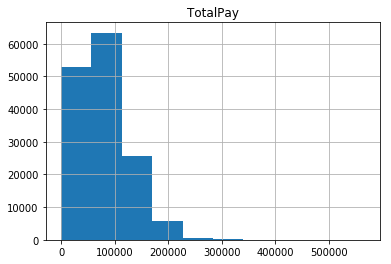

In [18]:
plot_csv_pandas.hist('TotalPay')

In [22]:
import handyspark
from handyspark import  *
hdf = plot_csv.toHandy()

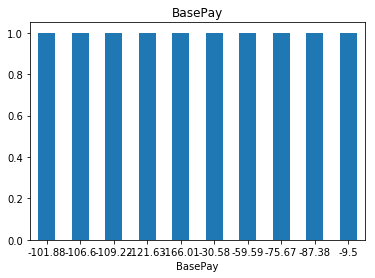

In [23]:
hdf.cols['BasePay'].hist()